In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
import seaborn as sns

from scipy.interpolate import griddata

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
data = pd.read_csv("howell1.csv", delimiter=";")

In [3]:
data.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [4]:
adults = data[data['age'] >= 18]
adults_mean_weight = adults['weight'].mean()

In [9]:
# writing a model for weight as a function of height in pymc3



with pm.Model() as weight_model:
    a = pm.Normal("a", mu=178, sd=20)
    b = pm.Normal("b", mu=0, sd=1)
    sigma = pm.Uniform("sigma", 0, 50)
    mu = a + b * (adults['weight'] - adults_mean_weight)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=adults['height'])
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
Sampling 4 chains, 0 divergences: 100%|██████████| 8000/8000 [00:01<00:00, 4379.89draws/s] 


In [11]:
az.summary(trace, kind='stats')

,mean,sd,hpd_3%,hpd_97%
a,154.600,0.273,154.118,155.147
b,0.903,0.044,0.822,0.988
sigma,5.104,0.193,4.733,5.456


Text(0, 0.5, 'height')

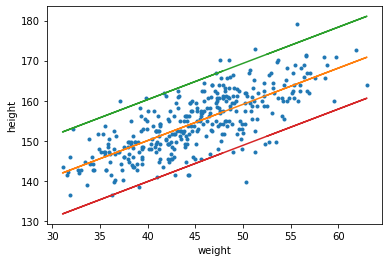

In [14]:
plt.plot(adults['weight'], adults['height'], ".")
plt.plot(adults['weight'], trace["a"].mean() + trace["b"].mean() * (adults['weight'] - adults_mean_weight))
plt.plot(adults['weight'], trace["a"].mean() + trace["b"].mean() * (adults['weight'] - adults_mean_weight) + 2*trace["sigma"].mean())
plt.plot(adults['weight'], trace["a"].mean() + trace["b"].mean() * (adults['weight'] - adults_mean_weight) - 2*trace["sigma"].mean())
plt.xlabel(adults.columns[1])
plt.ylabel(adults.columns[0])